# Bike Sharing Dataset Analysis

## Dataset Overview

> **Source:** UCI Machine Learning Repository  
> **DOI:** [10.24432/C5W894](https://doi.org/10.24432/C5W894)  
> **Citation:** Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository.  
> **License:** [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/legalcode)

## About the Dataset

This dataset contains **hourly and daily rental bike counts** from the **Capital Bikeshare system** in Washington, D.C., covering the years **2011-2012**. The data includes corresponding **weather** and **seasonal** information, making it ideal for regression analysis and time series forecasting.

### Key Characteristics

- **Instances:** 17,389 records
- **Features:** 13 attributes
- **Task Type:** Regression
- **Feature Types:** Integer, Real, Categorical, Binary
- **Missing Values:** None

## Dataset Features

### Temporal Features
- **instant:** Record index
- **dteday:** Date
- **season:** 1=winter, 2=spring, 3=summer, 4=fall
- **yr:** Year (0=2011, 1=2012)
- **mnth:** Month (1-12)
- **hr:** Hour (0-23) *[hourly data only]*
- **weekday:** Day of the week (0-6)
- **holiday:** Binary indicator for holidays
- **workingday:** 1 if neither weekend nor holiday, 0 otherwise

### Weather Features
- **weathersit:** Weather situation
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds
  - 3: Light Snow/Rain + Thunderstorm
  - 4: Heavy Rain/Snow + Fog
- **temp:** Normalized temperature in Celsius (range: -8°C to +39°C)
- **atemp:** Normalized "feels like" temperature (range: -16°C to +50°C)
- **hum:** Normalized humidity (0-1 scale)
- **windspeed:** Normalized wind speed (0-1 scale)

### Target Variables
- **casual:** Count of casual (non-registered) users
- **registered:** Count of registered users
- **cnt:** **Total rental bike count** (casual + registered)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the Dataset

In [2]:
from ucimlrepo import fetch_ucirepo

bike_sharing = fetch_ucirepo(id=275)

X = bike_sharing.data.features
y = bike_sharing.data.targets

### Exploratory Data Analysis (EDA)

In [3]:
X.shape

(17379, 13)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [5]:
X.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700


### Plots

In [6]:
sns.set_color_codes("bright")

#### Target Distribution

In [ ]:
sns.histplot(data=y["cnt"], color="b", edgecolor="white", bins=50, legend=False)
plt.show()

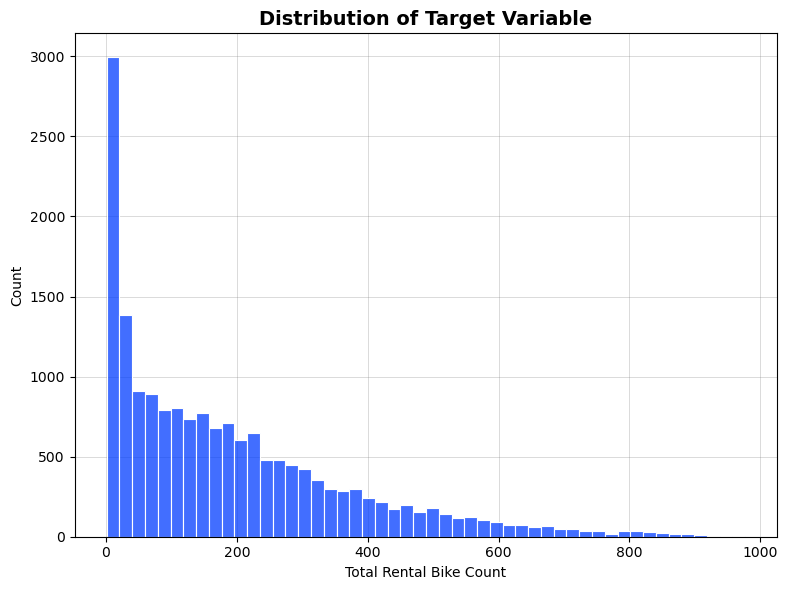

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=y["cnt"], color="b", edgecolor="white", ax=ax, bins=50, legend=False)
ax.set(xlabel="Total Rental Bike Count", ylabel="Count")
ax.set_title("Distribution of Target Variable", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.4, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Train / Test Split

In [8]:
from sklearn.model_selection import train_test_split

y_series = y["cnt"]

count_bins = pd.qcut(y_series, q=10, labels=False, duplicates="drop")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=count_bins, test_size=0.2, random_state=42)

In [9]:
from data.mapping import mapping

bike_train = X_train.copy()
bike_train["log_cnt"] = np.log1p(y_train["cnt"])

# Map categorical columns using the mapping dictionary
for col in ["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"]:
    if col in mapping:
        bike_train[col] = bike_train[col].map(mapping[col])


def median_order(col):
    return bike_train.groupby(col)["log_cnt"].median().sort_values(ascending=False).index


cat_cols = ["season", "mnth", "hr", "weekday", "weathersit", "holiday", "workingday", "yr"]
for col in cat_cols:
    bike_train[f"{col}"] = bike_train[col].astype("category").cat.set_categories(median_order(col), ordered=True)

#### Categoricals

In [10]:
from data.utils import summarise_categorical

for column in cat_cols:
    display(summarise_categorical(bike_train, column))

,count,mean,median,std,proportion
season,,,,,
Summer,3587,4.903741,5.288267,1.325597,0.258002
Spring,3522,4.696889,5.111988,1.411303,0.253327
Autumn,3392,4.662296,5.062595,1.383361,0.243976
Winter,3402,4.012517,4.343805,1.402052,0.244695


,count,mean,median,std,proportion
mnth,,,,,
July,1172,4.952127,5.325443,1.269197,0.084298
June,1157,4.901377,5.313206,1.341285,0.083219
August,1203,4.879363,5.288267,1.352630,0.086528
September,1150,4.855078,5.236442,1.376375,0.082716
May,1178,4.840451,5.247024,1.341296,0.084730
October,1160,4.771796,5.181784,1.391939,0.083435
April,1159,4.576089,4.927254,1.433684,0.083363
November,1126,4.562754,4.983607,1.372281,0.080990
December,1201,4.297106,4.682131,1.391838,0.086384


,count,mean,median,std,proportion
hr,,,,,
17,576,5.966322,6.186209,0.692833,0.041430
18,596,5.873012,6.045005,0.682040,0.042868
16,573,5.587428,5.723585,0.648770,0.041214
19,586,5.584021,5.763621,0.676545,0.042149
8,584,5.537069,5.928258,0.976499,0.042005
15,586,5.349593,5.422743,0.642134,0.042149
12,589,5.343649,5.433722,0.681197,0.042365
13,590,5.334921,5.404925,0.658801,0.042437
14,579,5.292747,5.361292,0.671532,0.041646


,count,mean,median,std,proportion
weekday,,,,,
Friday,2014,4.673658,5.111988,1.364438,0.144861
Saturday,1997,4.622131,4.859812,1.323287,0.143638
Thursday,1976,4.615170,5.040189,1.442933,0.142128
Sunday,1997,4.560522,4.762174,1.330708,0.143638
Wednesday,1988,4.525771,4.966329,1.497851,0.142991
Tuesday,1953,4.518733,4.990433,1.498211,0.140473
Monday,1978,4.501948,4.927254,1.466781,0.142271


,count,mean,median,std,proportion
weathersit,,,,,
"Clear, Few clouds, Partly cloudy",9127,4.674584,5.087596,1.413092,0.656477
"Mist + Cloudy, Mist + Broken clouds",3651,4.520563,4.897840,1.393724,0.262605
Heavy Rain/Snow + Fog,3,3.964972,3.610918,1.011537,0.000216
Light Snow/Rain + Thunderstorm,1122,3.935699,4.143135,1.386584,0.080702


,count,mean,median,std,proportion
holiday,,,,,
holiday,13492,4.581261,4.976734,1.420201,0.970438
not-holiday,411,4.347641,4.584967,1.395676,0.029562


,count,mean,median,std,proportion
workingday,,,,,
special day,9498,4.577028,5.023881,1.457587,0.683162
normal day,4405,4.568590,4.787492,1.335451,0.316838


,count,mean,median,std,proportion
yr,,,,,
2012,6969,4.821957,5.257495,1.415667,0.501259
2011,6934,4.325503,4.691348,1.380359,0.498741


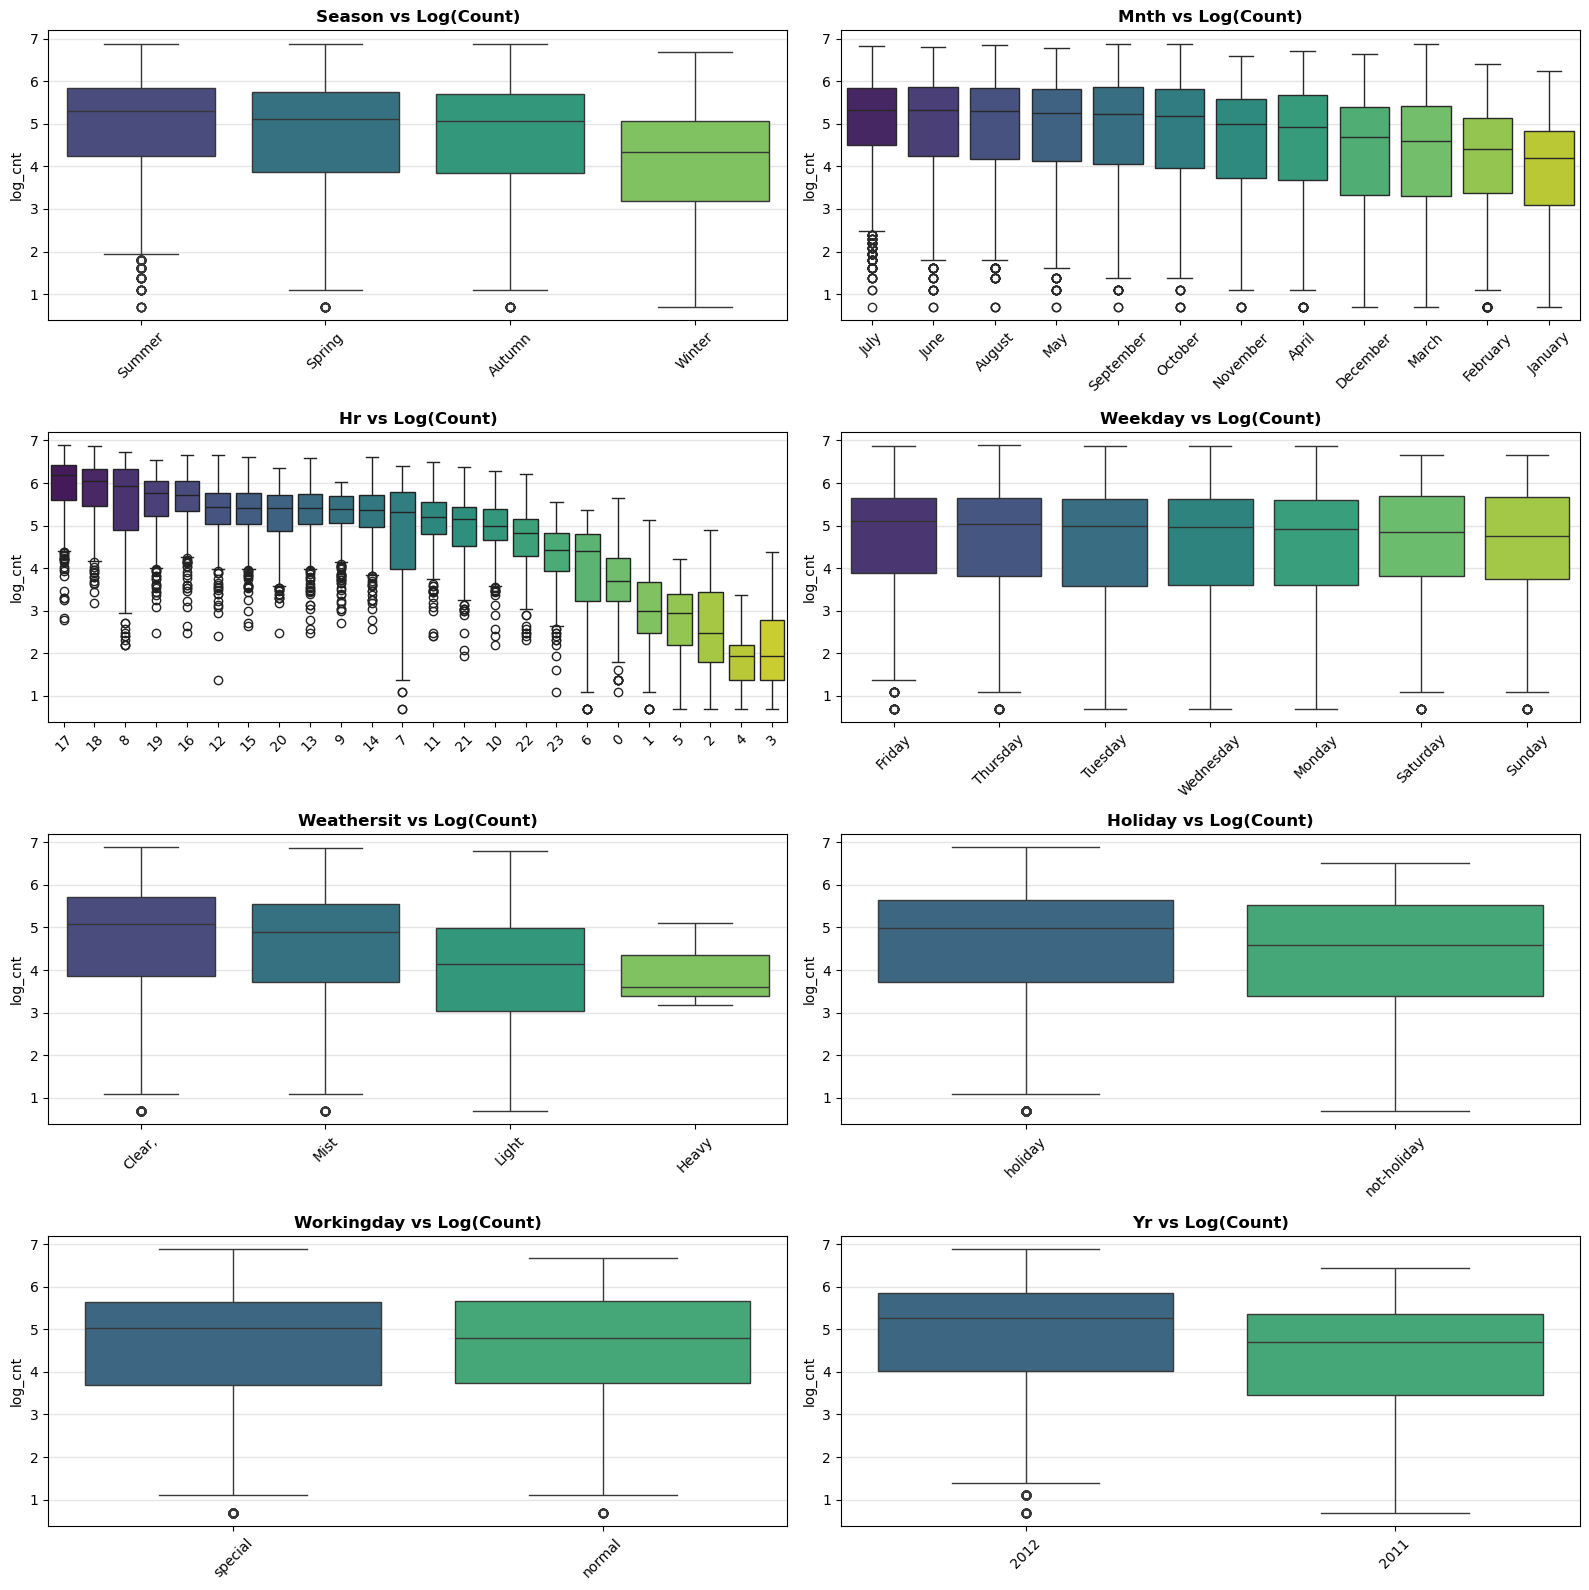

In [11]:
n_rows = int(np.ceil(len(cat_cols) / 2))

fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for axis, column in zip(axes, cat_cols):
    sns.boxplot(
        data=bike_train,
        x=column,
        y="log_cnt",
        hue=column,
        palette="viridis",
        ax=axis,
        legend=False,
    )
    axis.set_title(f"{column.title()} vs Log(Count)", fontweight="bold")
    axis.set_xlabel("")
    axis.grid(True, axis="y", alpha=0.2, linewidth=1, color="grey")

    # Get current tick labels and modify them
    labels = [label.get_text().split()[0] for label in axis.get_xticklabels()]
    axis.set_xticks(axis.get_xticks())
    axis.set_xticklabels(labels, rotation=45)

# if there are unused axes (in case len(cat_cols) not divisible by 3)
for axis in axes[len(cat_cols) :]:
    axis.remove()

plt.tight_layout()
plt.show()


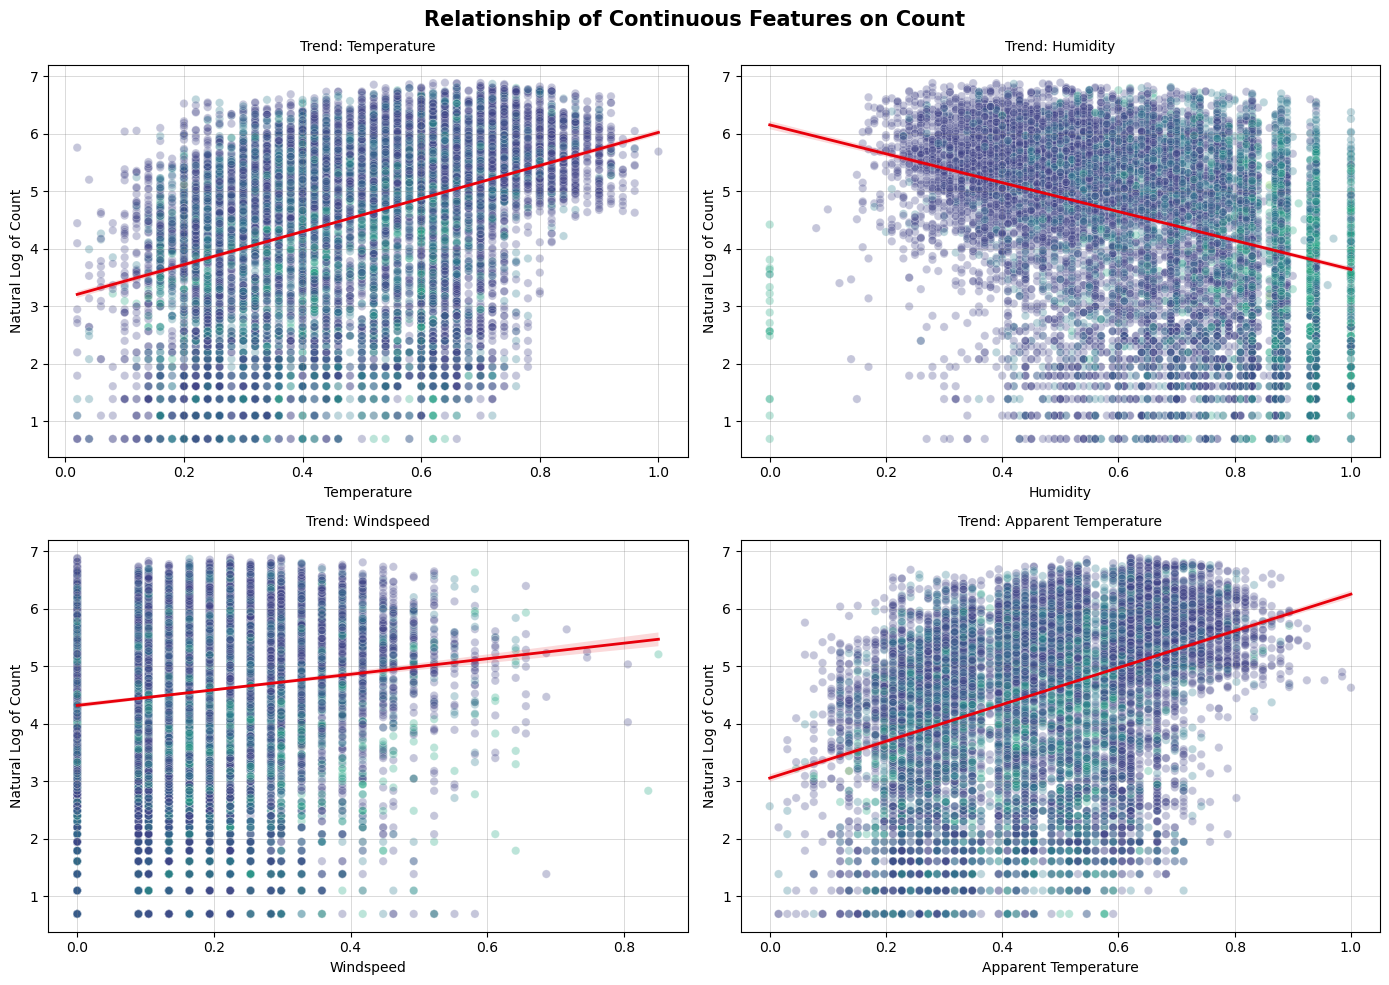

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14, 10))
axes = axes.flatten()

# Map column names to readable labels for better presentation
labels = {"temp": "Temperature", "hum": "Humidity", "windspeed": "Windspeed", "atemp": "Apparent Temperature"}

for i, col in enumerate(["temp", "hum", "windspeed", "atemp"]):
    sns.scatterplot(
        data=bike_train,
        x=col,
        y="log_cnt",
        hue="weathersit",
        palette="viridis",
        legend=False,
        alpha=0.3,
        ax=axes[i],
    )

    # This adds the analytical layer: showing the average trend.
    sns.regplot(
        data=bike_train,
        x=col,
        y="log_cnt",
        scatter=False,
        color="r",
        line_kws={"linewidth": 2},
        ax=axes[i],
    )

    # Set improved labels and title for each subplot
    axes[i].set_xlabel(labels[col], fontsize=10)
    axes[i].set_ylabel("Natural Log of Count", fontsize=10)

    axes[i].set_title(f"Trend: {labels[col]}", fontsize=10, pad=10)

    axes[i].grid(True, linewidth=0.4, alpha=0.5, color="grey")

# Add a main title for the entire figure
fig.suptitle("Relationship of Continuous Features on Count", fontsize=15, fontweight="bold")

plt.tight_layout()
plt.show()

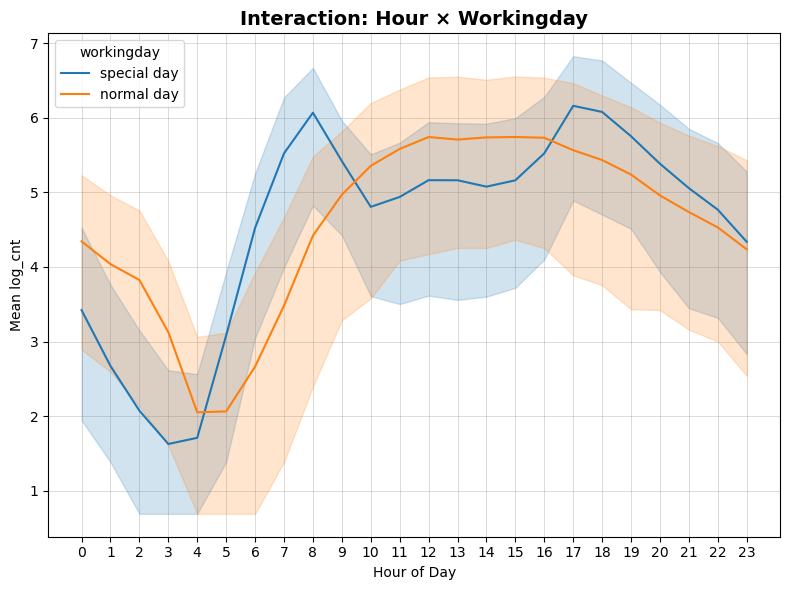

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    data=bike_train,
    x="hr",
    y="log_cnt",
    hue="workingday",
    estimator=np.mean,
    errorbar=("pi", 95),
    ax=ax,
)

ax.set_title("Interaction: Hour × Workingday", fontsize=14, fontweight="bold")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Mean log_cnt")
ax.grid(True, alpha=0.4, linewidth=0.5, color="grey")
ax.set_axisbelow(True)
ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()


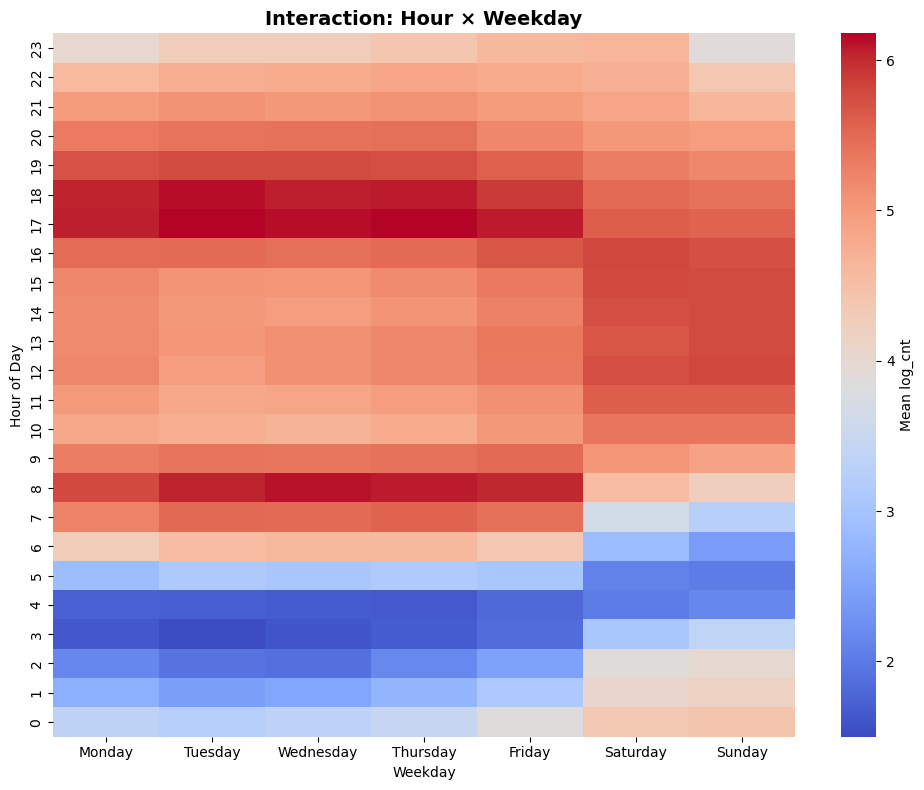

In [14]:
# Create the pivot table
pivot_hour_weekday = bike_train.pivot_table(
    index="hr",
    columns="weekday",
    values="log_cnt",
    aggfunc="mean",
    observed=True,
)

# This strips away any categorical ordering or string formatting
pivot_hour_weekday.index = pivot_hour_weekday.index.astype(int)

# Sort numerically
pivot_hour_weekday = pivot_hour_weekday.sort_index()

# Reorder columns (Weekdays)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_hour_weekday = pivot_hour_weekday.reindex(columns=weekday_order)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    pivot_hour_weekday,
    cmap="coolwarm",
    cbar_kws={"label": "Mean log_cnt"},
    ax=ax,
)

ax.set_title("Interaction: Hour × Weekday", fontsize=14, fontweight="bold")
ax.set_xlabel("Weekday")
ax.set_ylabel("Hour of Day")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

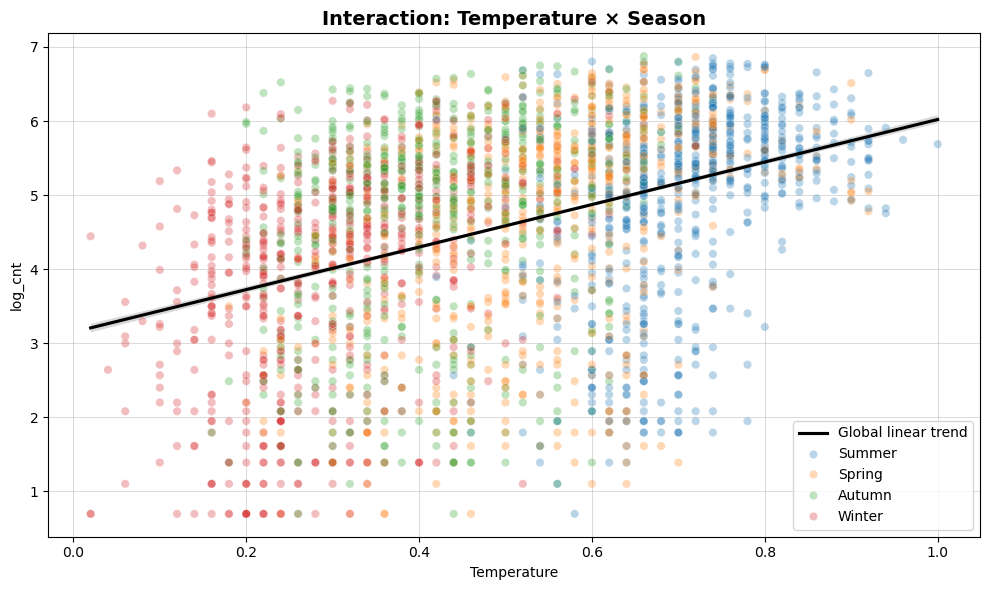

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Global linear trend
sns.regplot(
    data=bike_train,
    x="temp",
    y="log_cnt",
    scatter=False,
    color="black",
    label="Global linear trend",
    ax=ax,
)

# Season-specific scatter plot with downsampling
sns.scatterplot(
    data=bike_train.sample(frac=0.2, random_state=42),
    x="temp",
    y="log_cnt",
    hue="season",
    alpha=0.3,
    ax=ax,
)

ax.set_title("Interaction: Temperature × Season", fontsize=14, fontweight="bold")
ax.set_xlabel("Temperature")
ax.set_ylabel("log_cnt")
ax.legend()
ax.grid(True, alpha=0.4, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


#### Mutual Information vs Pearson and interpretation

In [16]:
continuous_cols = ["temp", "atemp", "hum", "windspeed"]
discrete_cols = [
    "season",
    "yr",
    "mnth",
    "hr",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
]

all_features = continuous_cols + discrete_cols

X_all = bike_train[all_features].copy()
y = bike_train["log_cnt"].values


In [17]:
for column in discrete_cols:
    X_all[column] = X_all[column].cat.codes

In [18]:
pearson_corr = bike_train[continuous_cols + ["log_cnt"]].corr(numeric_only=True)["log_cnt"].drop("log_cnt").to_frame(name="pearson_r")
display(pearson_corr)

,pearson_r
temp,0.389478
atemp,0.386659
hum,-0.340873
windspeed,0.116248


### Decoding Categorical Features

In [19]:
from data.utils import IntegerDecoder

# Initialize the IntegerDecoder with the mapping dictionary
decoder = IntegerDecoder(mapping=mapping, unknown_label="Unknown")


### Baseline Model: Linear Regression

In [20]:
from data.mapping import mapping
from data.utils import make_full_pipeline

baseline_pipe = make_full_pipeline(
    mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
    numerical_cols=["temp", "atemp", "hum", "windspeed"],
    categorical_cols=["hr"],
    mapping=mapping,
    log_target=True,
)

baseline_pipe.fit(X_train, y_train)

,regressor,Pipeline(step...egression())])
,transformer,None
,func,<ufunc 'log1p'>
,inverse_func,<ufunc 'expm1'>
,check_inverse,True
,transformers,"[('categorical', ...), ('numerical', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_baseline = baseline_pipe.predict(X_test)
r2 = r2_score(y_test, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae = mean_absolute_error(y_test, y_pred_baseline)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R2 Score: 0.6980
RMSE: 98.4162
MAE: 63.1203


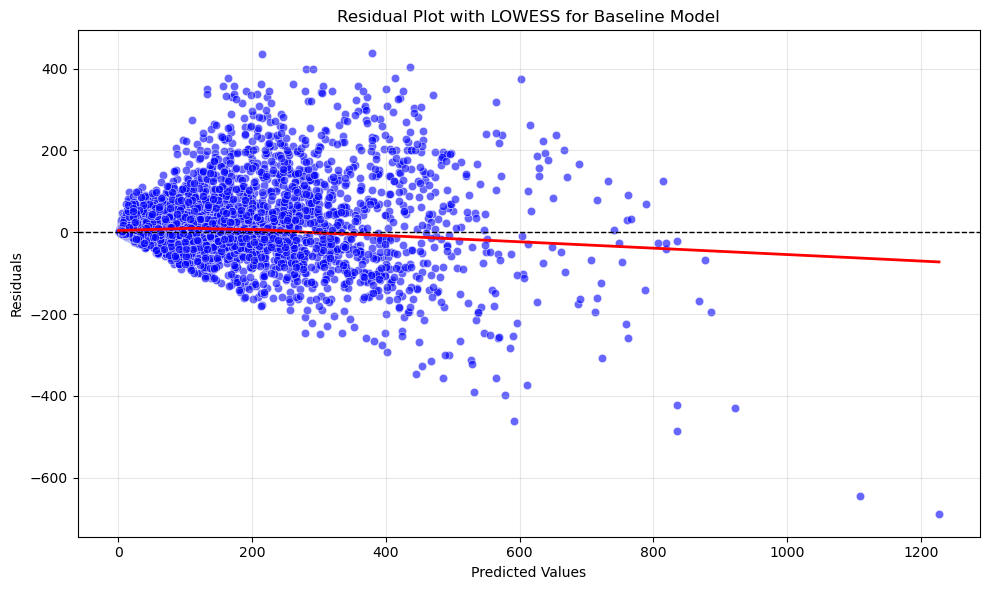

In [22]:
# Calculate residuals
residuals = y_test["cnt"] - y_pred_baseline.flatten()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of residuals vs predicted values
sns.scatterplot(x=y_pred_baseline.flatten(), y=residuals, ax=ax, alpha=0.6, color="blue")

# Add LOWESS smooth line
sns.regplot(x=y_pred_baseline.flatten(), y=residuals, ax=ax, lowess=True, scatter=False, color="red", line_kws={"linewidth": 2})

# Customize plot
ax.axhline(y=0, color="black", linestyle="--", linewidth=1)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot with LOWESS for Baseline Model")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
from data.utils import evaluate_candidates
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge

tree_candidates = {
    "baseline_ridge": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=Ridge(alpha=2.0),
    ),
    "random_forest": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42, n_jobs=-1),
    ),
    "hist_gradient_boosting": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=HistGradientBoostingRegressor(learning_rate=0.1, max_iter=100, random_state=42),
    ),
}

tree_results = evaluate_candidates(
    candidates=tree_candidates,
    X=X_train,
    y=y_train,
    n_splits=5,
    n_jobs=-1,
    sort_by="rmse",
)

display(tree_results.T)

Evaluating baseline_ridge...
Evaluating random_forest...
Evaluating hist_gradient_boosting...


,0,1,2
Model,hist_gradient_boosting,random_forest,baseline_ridge
test_r2 (mean),0.92109,0.885623,0.709408
test_r2 (std),0.003595,0.002432,0.01534
train_r2 (mean),0.932791,0.980699,0.712965
train_r2 (std),0.001835,0.00048,0.002389
test_rmse (mean),51.098033,61.519557,98.009423
test_rmse (std),1.515025,0.657216,1.598258
train_rmse (mean),47.164704,25.275984,97.478532
train_rmse (std),0.593731,0.356572,0.244448
test_mae (mean),31.70012,37.988385,63.290073


In [ ]:
histgradient_pipe = make_full_pipeline(
    mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
    numerical_cols=["temp", "atemp", "hum", "windspeed"],
    categorical_cols=["hr"],
    mapping=mapping,
    log_target=True,
    model=HistGradientBoostingRegressor(learning_rate=0.1, max_iter=100, random_state=42),
)

histgradient_pipe.fit(X_train, y_train["cnt"].values)
y_pred_hgb = histgradient_pipe.predict(X_test)

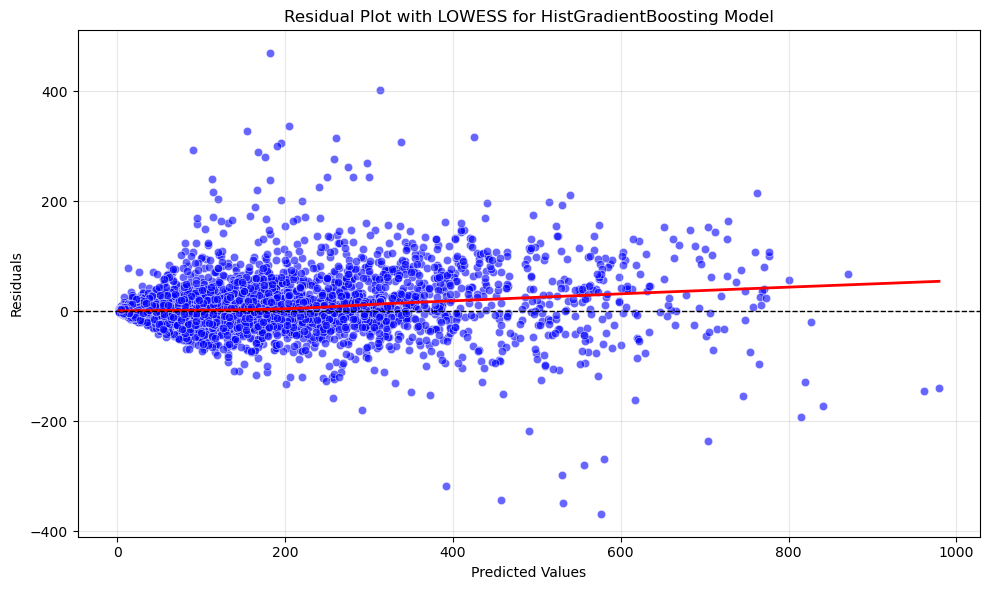

In [25]:
# Calculate residuals
residuals = y_test["cnt"] - y_pred_hgb.flatten()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of residuals vs predicted values
sns.scatterplot(x=y_pred_hgb.flatten(), y=residuals, ax=ax, alpha=0.6, color="blue")

# Add LOWESS smooth line
sns.regplot(x=y_pred_hgb.flatten(), y=residuals, ax=ax, lowess=True, scatter=False, color="red", line_kws={"linewidth": 2})

# Customize plot
ax.axhline(y=0, color="black", linestyle="--", linewidth=1)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot with LOWESS for HistGradientBoosting Model")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree_candidates["hist_gradient_boosting"],
    X=X_train,
    y=y_train["cnt"].values,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 8),
    shuffle=True,
    random_state=42,
    n_jobs=-1,
)

# Average across folds
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

results = pd.DataFrame({
    "train_size": np.concatenate([train_sizes, train_sizes]),
    "score": np.concatenate([train_mean, test_mean]),
    "set": ["train"] * len(train_sizes) + ["cv"] * len(train_sizes),
})
results.head()

,train_size,score,set
0,1112,0.938545,train
1,2542,0.939209,train
2,3972,0.936402,train
3,5402,0.934350,train
4,6832,0.933746,train


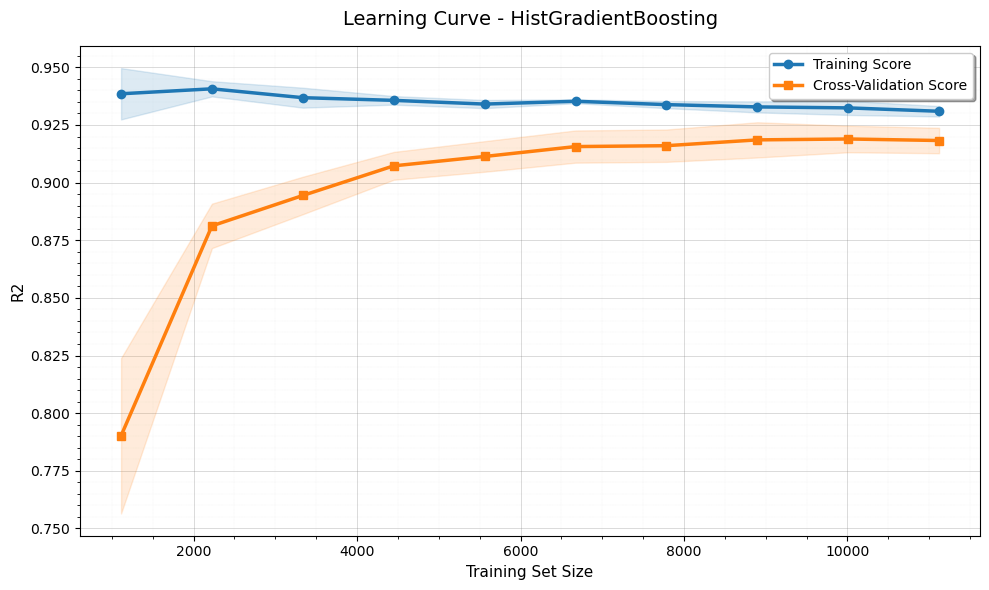

In [34]:
from data.utils import plot_learning_curve
from sklearn.ensemble import HistGradientBoostingRegressor

plot_learning_curve(
    estimator=tree_candidates["hist_gradient_boosting"],
    X=X_train,
    y=y_train,
    cv=5,
    scoring="r2",
    title="Learning Curve - HistGradientBoosting",
)

### Another Round of Candidate Models

In [44]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

boost_candidates = {
    "XGBoost": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.05, min_child_weight=3, subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42, n_jobs=-1),
    ),
    "LightGBM": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=LGBMRegressor(
            n_estimators=300,
            max_depth=8,
            learning_rate=0.05,
            num_leaves=50,
            min_child_samples=20,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            n_jobs=-1,
            verbose=-1,
        ),
    ),
    "CatBoost": make_full_pipeline(
        mapping_cols=["season", "yr", "mnth", "holiday", "weekday", "weathersit", "workingday"],
        numerical_cols=["temp", "atemp", "hum", "windspeed"],
        categorical_cols=["hr"],
        mapping=mapping,
        log_target=True,
        model=CatBoostRegressor(iterations=500, depth=8, learning_rate=0.05, l2_leaf_reg=3, subsample=0.8, random_seed=42, verbose=0, allow_writing_files=False),
    ),
}

boost_results = evaluate_candidates(
    candidates=boost_candidates,
    X=X_train,
    y=y_train,
    n_splits=5,
    n_jobs=-1,
    sort_by="rmse",
)

display(boost_results.T)

Evaluating XGBoost...
Evaluating LightGBM...
Evaluating CatBoost...


,0,1,2
Model,CatBoost,XGBoost,LightGBM
test_r2 (mean),0.927878,0.924664,0.924407
test_r2 (std),0.003197,0.002837,0.002621
train_r2 (mean),0.941071,0.956198,0.94557
train_r2 (std),0.000789,0.000306,0.000676
test_rmse (mean),48.840496,49.924216,50.012274
test_rmse (std),1.008336,1.034578,1.037028
train_rmse (mean),44.167152,38.079492,42.447937
train_rmse (std),0.26306,0.096629,0.237302
test_mae (mean),30.847234,31.313696,31.565328
